In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import datetime

In [131]:
corn = pd.read_csv('commodities/corn.csv')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_16232\3067839850.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  corn = pd.read_csv('commodities/corn.csv')


In [134]:
corn = corn.sort_values(by=['FutCode', 'Date_'])
corn = corn.reset_index().drop(columns=['index'])
display(corn)
display(len(corn['FutCode'].unique()))

,FutCode,Date_,Open_,High,Low,Volume,Settlement,OpenInterest,P,PB,...,ContrTypeCode,SrcCode,DSClsID,trdmonths,UnitDesc,ExchangeDescription,DSContrID,TrdStatCodeDS,SttlmntDate,SettlementDate
0,42266,2009-04-06,458.50,458.50,458.50,0.0,458.50,0.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
1,42266,2009-04-07,455.50,455.50,453.50,17.0,450.50,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
2,42266,2009-04-08,451.75,451.75,451.75,0.0,451.75,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
3,42266,2009-04-09,447.75,447.75,447.75,0.0,447.75,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
4,42266,2009-04-13,445.25,445.25,445.25,0.0,445.25,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129956,460491,2024-03-05,470.00,470.00,470.00,1.0,469.00,2.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20260916.0,2026-09-16
129957,460491,2024-03-06,471.00,471.00,471.00,0.0,471.00,2.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20260916.0,2026-09-16
129958,460491,2024-03-07,475.50,475.50,475.50,0.0,475.50,2.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20260916.0,2026-09-16
129959,460491,2024-03-08,475.50,475.50,475.50,0.0,475.50,2.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20260916.0,2026-09-16


276

In [123]:
corn.iloc[0][['StartDate', 'LastTrdDate', 'SettlementDate']]
corn[corn['LastTrdDate']== '2011-03-14']

,FutCode,Date_,Open_,High,Low,Volume,Settlement,OpenInterest,P,PB,...,ContrTypeCode,SrcCode,DSClsID,trdmonths,UnitDesc,ExchangeDescription,DSContrID,TrdStatCodeDS,SttlmntDate,SettlementDate
0,42266,2009-04-06,458.50,458.50,458.50,0.0,458.50,0.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
1,42266,2009-04-07,455.50,455.50,453.50,17.0,450.50,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
2,42266,2009-04-08,451.75,451.75,451.75,0.0,451.75,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
3,42266,2009-04-09,447.75,447.75,447.75,0.0,447.75,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
4,42266,2009-04-13,445.25,445.25,445.25,0.0,445.25,13.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,42266,2011-03-08,710.75,712.00,694.50,4674.0,698.75,4529.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
485,42266,2011-03-09,699.00,707.25,685.00,3446.0,695.00,2908.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
486,42266,2011-03-10,694.50,696.00,675.00,2715.0,676.25,1672.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16
487,42266,2011-03-11,677.75,677.75,646.25,1486.0,659.25,736.0,NaN,NaN,...,FUT,1022.0,CCF,DEC JUL MAR MAY SEP,Bushels,Chicago Board of Trade (CBOT),CCF,A,20110316.0,2011-03-16


In [124]:
# create contract data

corn_contracts = corn['FutCode'].unique()
contracts = pd.DataFrame(columns=['FutCode', 'duration', 'start', 'settlement_date', 'last_trade_date'])
for contract in corn_contracts:
    first = corn[corn['FutCode']==contract].iloc[0]
    dates = corn[corn['FutCode']==contract]['Date_']
    start = first['StartDate']
    end = first['SettlementDate']
    lasttrd = first['LastTrdDate']
    # sy, sm, sd = start.split('-')
    # ey, em, ed = end.split('-')
    s = datetime.date(*[int(dt) for dt in start.split('-')])
    e = datetime.date(*[int(dt) for dt in end.split('-')])
    delta = e-s
    duration = delta.days
    # pd.concat(contracts, {'FutCode':contract, 'duration': duration, 'start': start, 'end': end}
    contracts = pd.concat([contracts, pd.DataFrame([[contract, duration, start, end, lasttrd]], columns=contracts.columns)], ignore_index=True)
    # print({'FutCode':contract, 'duration': duration, 'start': start, 'end': end})
    
contracts = contracts.set_index('FutCode')

In [139]:
print(sorted(contracts['duration'].unique()))

[80, 141, 203, 262, 352, 353, 354, 355, 356, 357, 358, 387, 410, 415, 416, 418, 421, 422, 424, 426, 427, 428, 429, 431, 441, 443, 444, 447, 456, 457, 458, 460, 462, 470, 474, 477, 481, 482, 484, 485, 486, 487, 488, 489, 490, 491, 492, 497, 501, 504, 507, 510, 511, 513, 516, 517, 518, 519, 539, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 574, 576, 578, 581, 600, 602, 607, 608, 609, 626, 629, 638, 658, 660, 667, 685, 700, 704, 708, 709, 720, 721, 728, 730, 732, 745, 769, 789, 816, 819, 821, 822, 823, 824, 825, 830, 856, 868, 880, 882, 883, 884, 885, 886, 887, 930, 939, 940, 941, 942, 943, 944, 946, 960, 1003, 1005, 1006, 1007, 1008, 1011, 1040, 1070, 1081, 1085, 1092, 1093, 1094, 1095, 1096, 1097, 1135, 1215, 1219, 1245, 1249, 1256, 1289, 1307, 1308, 1309, 1310, 1311, 1312, 1339, 1372, 1409, 1460, 1461, 1462, 1463, 1464, 1466, 1469, 1548]


In [2]:
# we now need to find nearby, next-out, and year-out contracts as in 
# Andreas Neuhierl and Andrew Joseph Thompson. Trend following strategies in commodity markets and the impact of financialization.

def find_contract_duration(data, duration, threshold):
    all_contracts = data['FutCode'].unique()
    # print(len(all_contracts))
    pairs = []
    dates = dict()
    for cont in all_contracts[:]:
        data1 = data[data['FutCode']==cont]
        start1, settlement1 = data1.iloc[0][['StartDate', 'SettlementDate']]
        if pd.isna(start1) or pd.isna(settlement1):
            all_contracts = all_contracts[all_contracts != cont]
            continue
        start1, settlement1 = datetime.date(*[int(dt) for dt in start1.split('-')]), datetime.date(*[int(dt) for dt in settlement1.split('-')])
        dates[cont] = (start1, settlement1)
    # print(dates)

    for cont1 in all_contracts:
        for cont2 in all_contracts:
            if cont1 == cont2:
                continue
            start1, settlement1 = dates[cont1]
            start2, settlement2 = dates[cont2]
            dur1, dur2 = settlement1-start1, settlement2-start1 # we only need to consider contract 2 if contract 1 is already active
            if start2 <= start1 and ( duration - threshold <= dur2.days-dur1.days and dur2.days-dur1.days <= duration+threshold):
                pairs.append((cont1,cont2,dur2.days-dur1.days))
    return pairs

def find_triples(data):
    two_month_pairs = find_contract_duration(data, 60, 20)
    one_year_out = find_contract_duration(data, 365, 100)
    triples = []
    for cont1, cont2, duration in two_month_pairs:
        # need to find one about 1 year out from cont1
        for item in one_year_out:
            if cont1 == item[0] and cont2 != item[1]:
                triples.append((cont1, cont2, item[1], duration, item[2]))
                
    print(f'{len(triples)} sets of triples used for calendar spread')
    return triples

# triples = find_triples(corn)
# print(triples)
# print(len(triples))
# for cont1, _,_,_,_ in triples:
    # print(corn[corn['FutCode']==cont1]['Date_'].iloc[0], corn[corn['FutCode']==cont1]['Date_'].iloc[-1])

In [3]:
# signals = []
def get_pos(data):
    dates = data['Date_'].unique()
    dates.sort()
    contracts = data['FutCode'].unique()
    pos = pd.DataFrame(0, index=dates, columns=contracts)
    triples = find_triples(data)
    for cont1, cont2, cont3, dur1, dur2 in triples:
        # filter dates so only after cont1 start
        data1 = data[data['FutCode']==cont1]
        data2 = data[data['FutCode']==cont2]
        data3 = data[data['FutCode']==cont3]
        dates1, dates2, dates3 = data1['Date_'], data2['Date_'], data3['Date_']
        common_dates = dates1[dates1.isin(dates2)]
        common_dates = common_dates[common_dates.isin(dates3)]
        # print(common_dates, len(common_dates))
        data1, data2, data3 = data1[data1['Date_'].isin(common_dates)].set_index('Date_'), data2[data2['Date_'].isin(common_dates)].set_index('Date_'), data3[data3['Date_'].isin(common_dates)].set_index('Date_')
        # print(data1)
        # signal series
        logs = np.log(data1['Settlement']) - np.log(data2['Settlement'])
        signal = logs
        # spread = data1['Settlement'] - data3['Settlement']
        moving_average = logs.rolling(window=10).mean()  
        last = 0
        for date in moving_average.index:
            if moving_average.loc[date] != np.nan:
                if last == 0:
                    last = date
                    continue
                if signal.loc[last] > moving_average.loc[last]:
                    pos.loc[date, cont1] += 1
                    pos.loc[date, cont3] += -1 
                elif signal.loc[last] < moving_average.loc[last]:
                    pos.loc[date, cont1] += -1
                    pos.loc[date, cont3] += 1
                last = date 
        
    return pos

# positions = get_pos(corn)
# display(positions)

In [4]:
def get_returns(data):
    pos = get_pos(data).astype(np.float64)
    dates = data['Date_'].unique()
    dates.sort()
    returns = pd.DataFrame(0, index=dates, columns=['Return'], dtype=np.float64)
    for contract in pos.columns:
        # display(positions[contract].shift())
        # display(data[data['FutCode']==contract]['Settlement'].ffill().fillna(0).pct_change())
        # return
        # print(data['Date_'].isin(pos.index))
        contract_data = data[data['FutCode']==contract]
        contract_dates = contract_data['Date_']
        settlements = contract_data.set_index('Date_').loc[contract_dates]['Settlement'].astype(np.float64)
        # print((pos.loc[contract_dates, contract].shift() * settlements.pct_change()).fillna(0))
        # print((pos.loc[contract_dates, contract].shift() * settlements.pct_change()).fillna(0).index)
        # print(returns.loc[(pos.loc[contract_dates, contract].shift() * settlements.pct_change()).fillna(0).index])
        returns.loc[contract_dates, 'Return'] += (pos.loc[contract_dates, contract].shift() * settlements.ffill().pct_change()).fillna(0)
        # if (pos.loc[contract_dates, contract].shift() * settlements.pct_change()).fillna(0).isnull().values.any():
            # print('bruh wtf')
    return returns

# returns = get_returns(corn)
# display(returns)

In [5]:
import sys
sys.path.append('../')
from metrics import print_all_metrics, cumulative_returns

In [6]:
def plot_cumulative_returns(data, title, year='1800'):
    returns = get_returns(data)
    returns = returns[year:]
    print_all_metrics(returns['Return'])
    cumulative_rets = cumulative_returns(returns)
    # plt.plot(cumulative_returns.index, cumulative_returns['Return'])
    cumulative_rets.plot(title=title, figsize=(10,8))
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()
# plot_cumulative_returns(corn)

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\3835558795.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  natgas = pd.read_csv('commodities/NaturalGas.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


799 sets of triples used for calendar spread
annualized_sharpe_ratio: -0.05063376078228957
annualized_return: -0.3321436112923734
annualized_volatility: 6.559726280662703
skewness: 0.08108217364079562
kurtosis: 23.567422056669344
max_drawdown: -1.0079722101288902


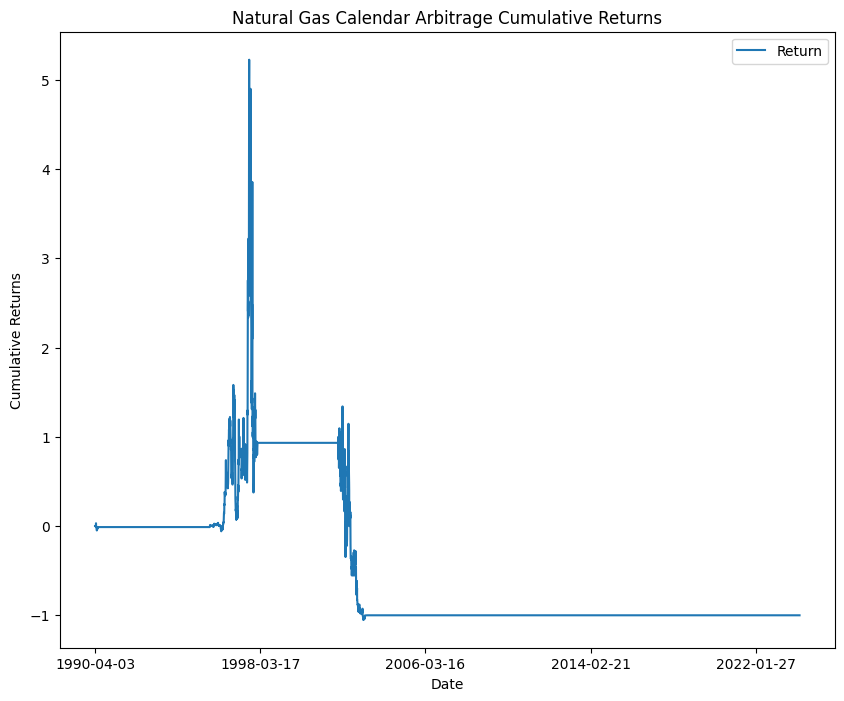

In [9]:
natgas = pd.read_csv('commodities/NaturalGas.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(natgas, 'Natural Gas Calendar Arbitrage Cumulative Returns')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\1130578252.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  wheatcomposite = pd.read_csv('commodities/wheatcomposite.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


11 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.1945870890022171
annualized_return: 0.022176623602621216
annualized_volatility: 0.11396760040111674
skewness: 22.030582373179932
kurtosis: 1294.332948083872
max_drawdown: -0.5646274462483687


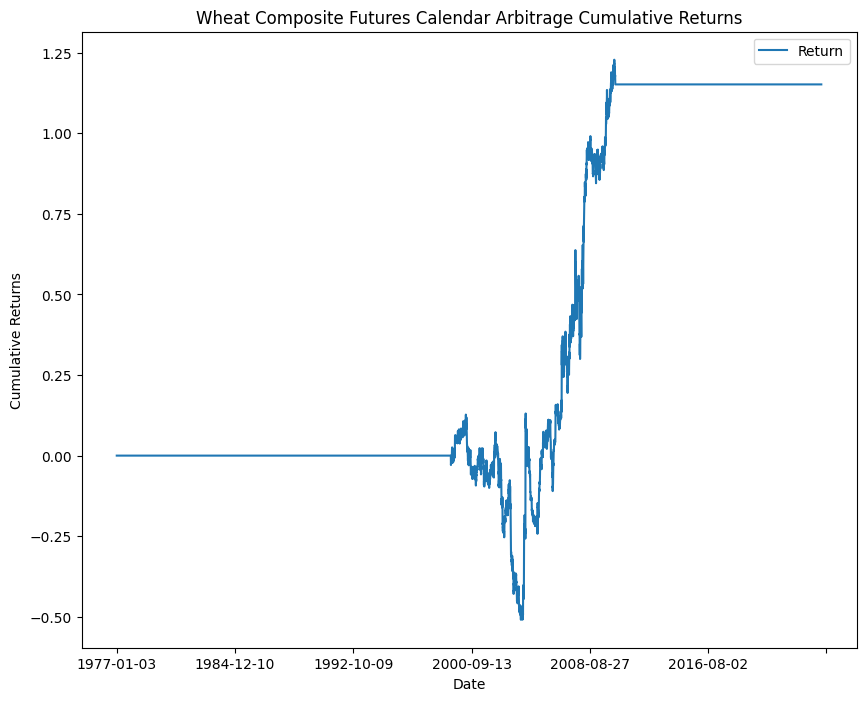

11 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.25204979492096863
annualized_return: 0.0372066483841246
annualized_volatility: 0.1476162612859531
skewness: 16.99320147941618
kurtosis: 770.2016417440132
max_drawdown: -0.5646274462483687


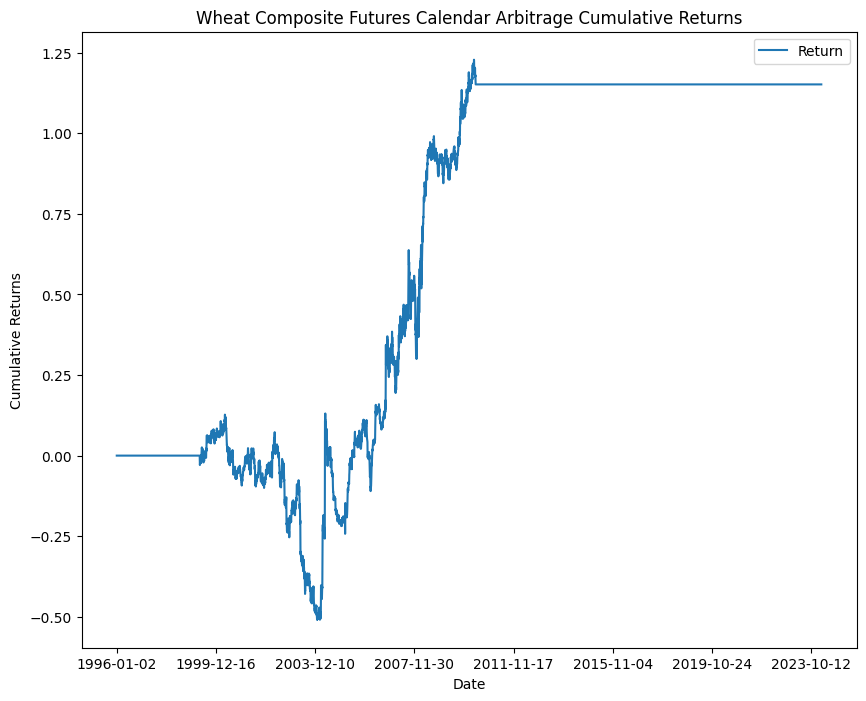

In [10]:
wheatcomposite = pd.read_csv('commodities/wheatcomposite.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(wheatcomposite, 'Wheat Composite Futures Calendar Arbitrage Cumulative Returns')
plot_cumulative_returns(wheatcomposite, 'Wheat Composite Futures Calendar Arbitrage Cumulative Returns', year='1996')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\3755636365.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  soybeancomposite = pd.read_csv('commodities/soybeancomposite.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


130 sets of triples used for calendar spread
annualized_sharpe_ratio: nan
annualized_return: nan
annualized_volatility: nan
skewness: nan
kurtosis: nan
max_drawdown: -inf


c:\Users\abhiv\miniconda3\envs\mse244\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


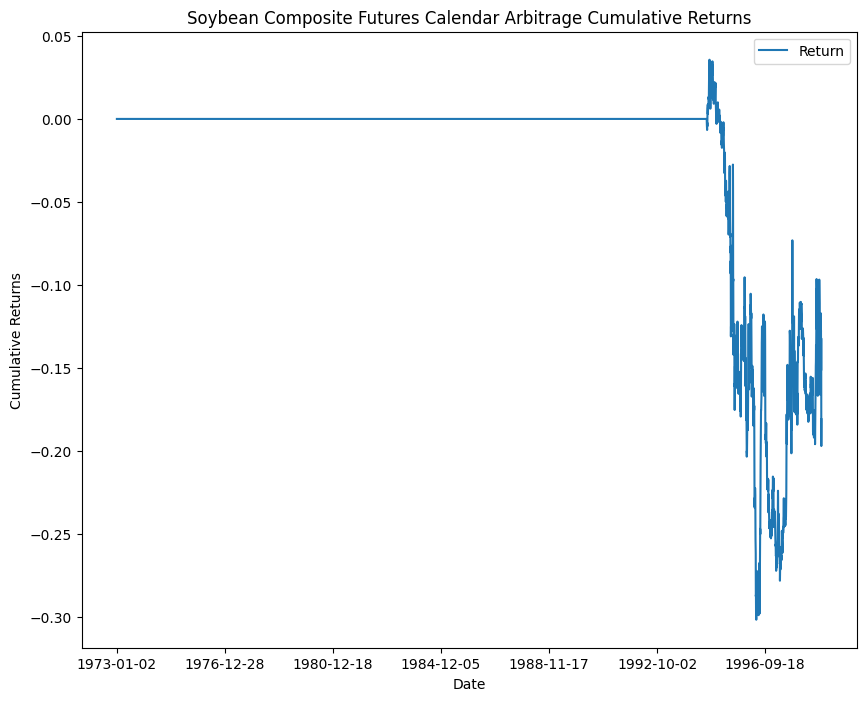

130 sets of triples used for calendar spread
annualized_sharpe_ratio: nan
annualized_return: nan
annualized_volatility: nan
skewness: nan
kurtosis: nan
max_drawdown: -inf


c:\Users\abhiv\miniconda3\envs\mse244\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


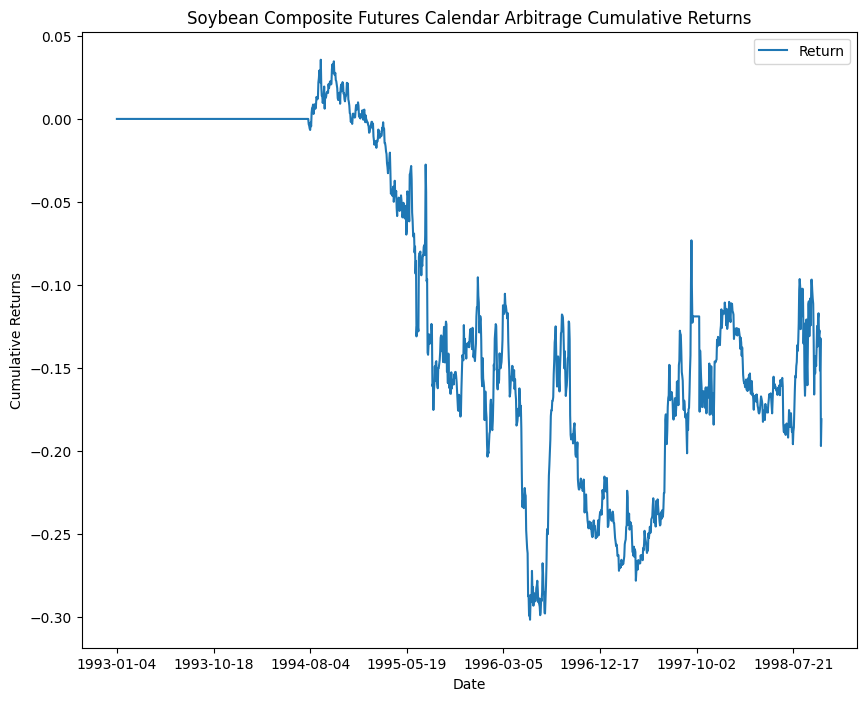

In [11]:
soybeancomposite = pd.read_csv('commodities/soybeancomposite.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(soybeancomposite, 'Soybean Composite Futures Calendar Arbitrage Cumulative Returns')
plot_cumulative_returns(soybeancomposite, 'Soybean Composite Futures Calendar Arbitrage Cumulative Returns', year='1993')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\3712180560.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  corn = pd.read_csv('commodities/corn.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


33 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.28070815542819616
annualized_return: 0.03625368292996047
annualized_volatility: 0.12915080032020657
skewness: 0.2603730645282009
kurtosis: 28.607696394063044
max_drawdown: -0.5996254021424242


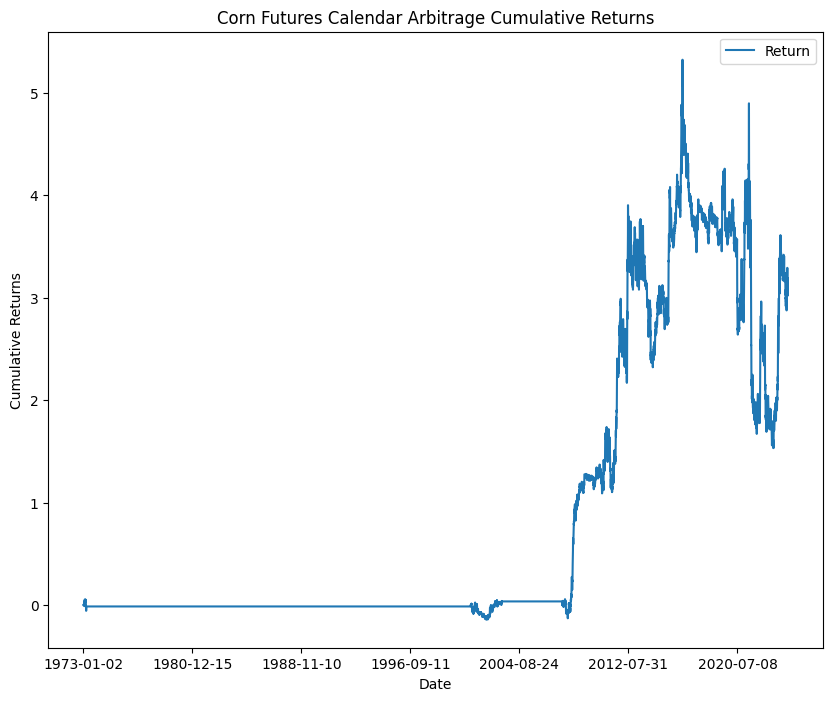

33 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.4575648881720279
annualized_return: 0.09385397380383508
annualized_volatility: 0.20511620587580873
skewness: 0.10400165857600921
kurtosis: 10.119953813149545
max_drawdown: -0.5996254021424257


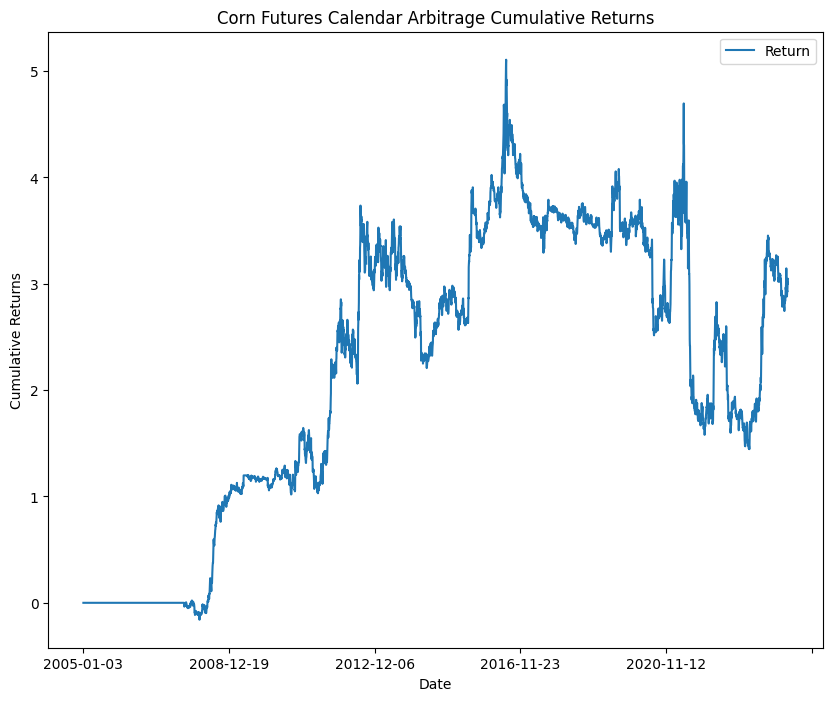

In [7]:
corn = pd.read_csv('commodities/corn.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(corn, 'Corn Futures Calendar Arbitrage Cumulative Returns')
plot_cumulative_returns(corn, 'Corn Futures Calendar Arbitrage Cumulative Returns', year='2005')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\2751326028.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  sugar = pd.read_csv('commodities/Sugar11.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


23 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.0862660259733136
annualized_return: 0.016080144850933197
annualized_volatility: 0.1864018270171341
skewness: -0.06742835950925391
kurtosis: 53.86780724856192
max_drawdown: -0.6460241034860682


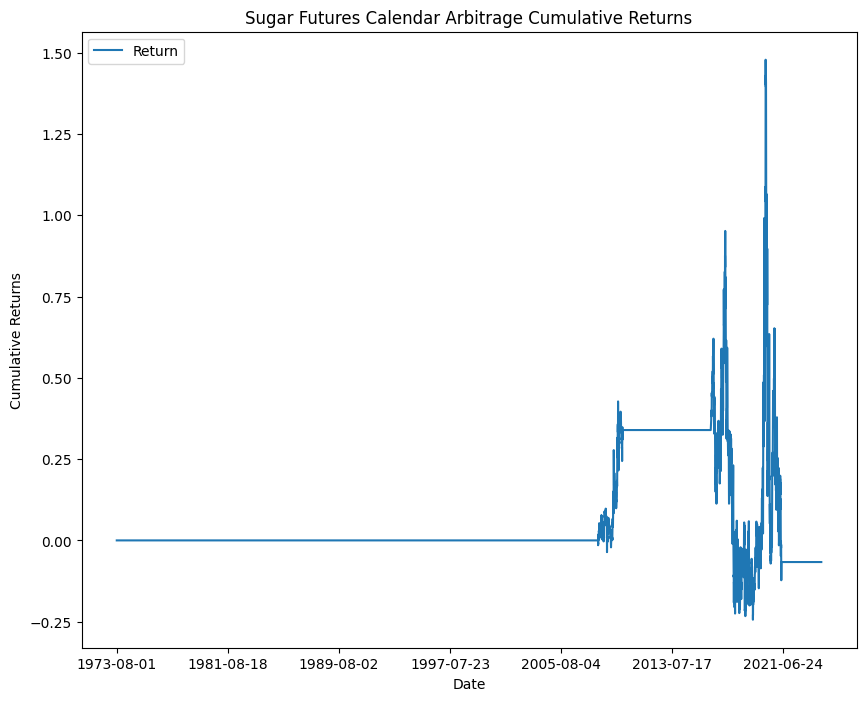

23 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.1435586576959513
annualized_return: 0.044535574797889235
annualized_volatility: 0.3102256284132507
skewness: -0.05787045093249969
kurtosis: 17.548767399811204
max_drawdown: -0.6460241034860682


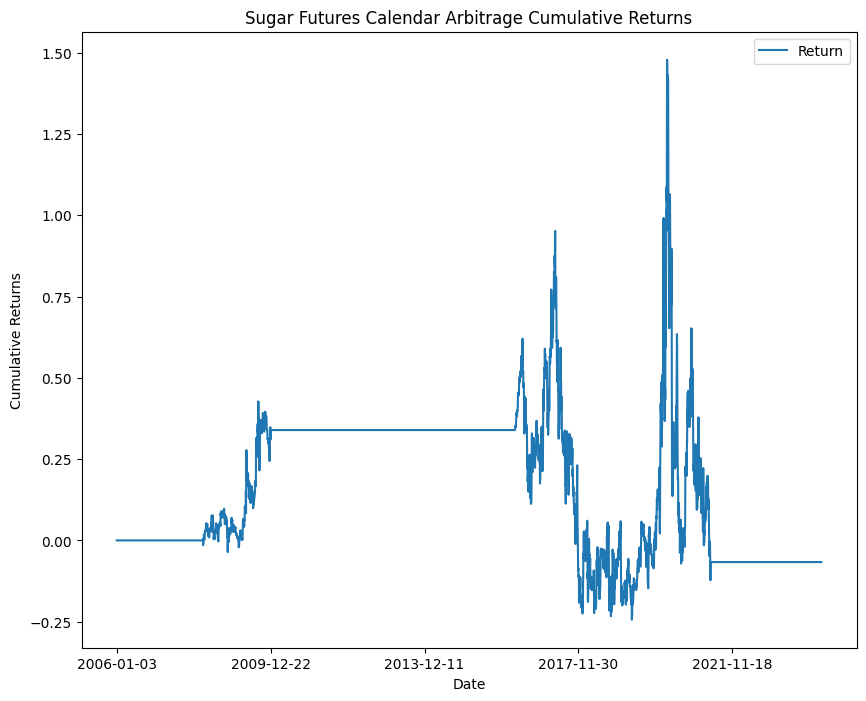

In [12]:
sugar = pd.read_csv('commodities/Sugar11.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(sugar, 'Sugar Futures Calendar Arbitrage Cumulative Returns')
plot_cumulative_returns(sugar, 'Sugar Futures Calendar Arbitrage Cumulative Returns', year='2006')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\261965096.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  crudeoil = pd.read_csv('commodities/crudeoil.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


660 sets of triples used for calendar spread


c:\Users\abhiv\miniconda3\envs\mse244\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


annualized_sharpe_ratio: 0.18280575774230087
annualized_return: 0.6966000180759274
annualized_volatility: 3.810602175112648
skewness: -0.4373347250369476
kurtosis: 60.73533854583808
max_drawdown: -1.000010721871372


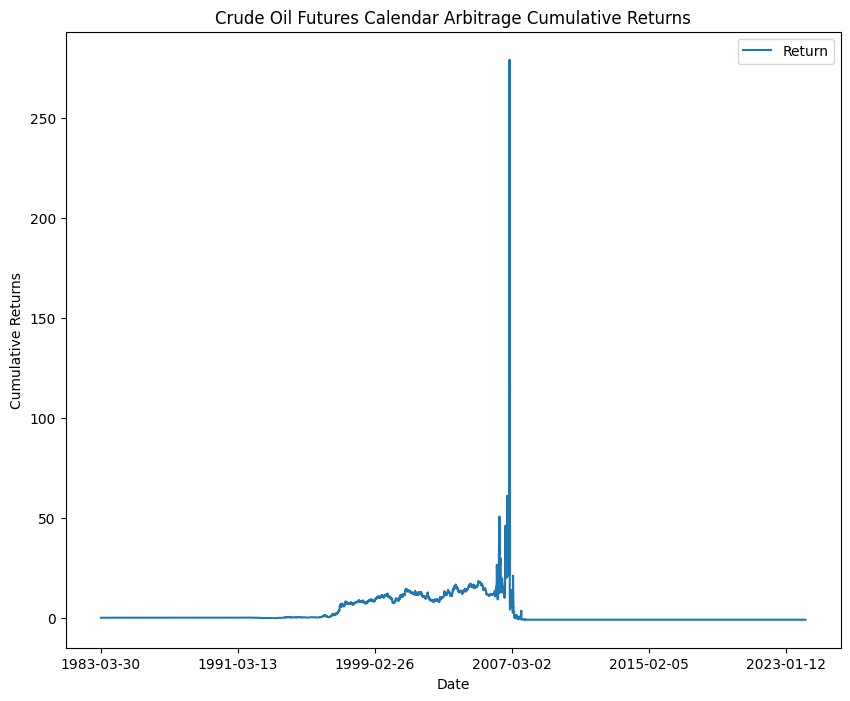

660 sets of triples used for calendar spread


c:\Users\abhiv\miniconda3\envs\mse244\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


annualized_sharpe_ratio: 0.21462111958211444
annualized_return: 0.9687030847400373
annualized_volatility: 4.51354967594142
skewness: -0.38080584441421267
kurtosis: 42.46579329906945
max_drawdown: -1.000010721871372


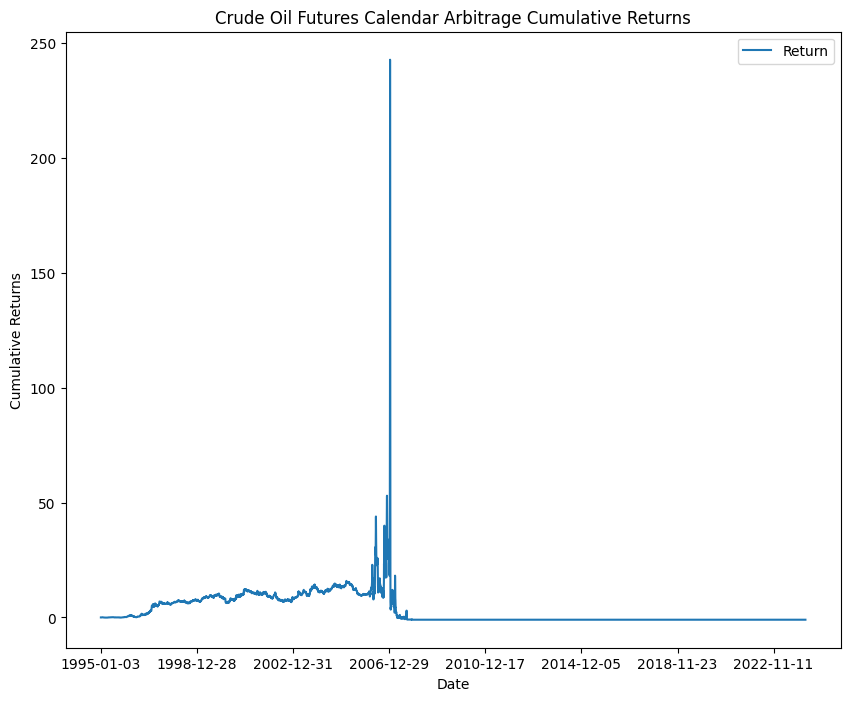

In [13]:
crudeoil = pd.read_csv('commodities/crudeoil.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(crudeoil, 'Crude Oil Futures Calendar Arbitrage Cumulative Returns')
plot_cumulative_returns(crudeoil, 'Crude Oil Futures Calendar Arbitrage Cumulative Returns', '1995')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\880584261.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  lumber = pd.read_csv('commodities/lumber.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


4 sets of triples used for calendar spread
annualized_sharpe_ratio: -0.10086909867786183
annualized_return: -0.0018645160067626296
annualized_volatility: 0.01848451142323772
skewness: -9.323881965370528
kurtosis: 762.9137505287567
max_drawdown: -0.12139773660525288


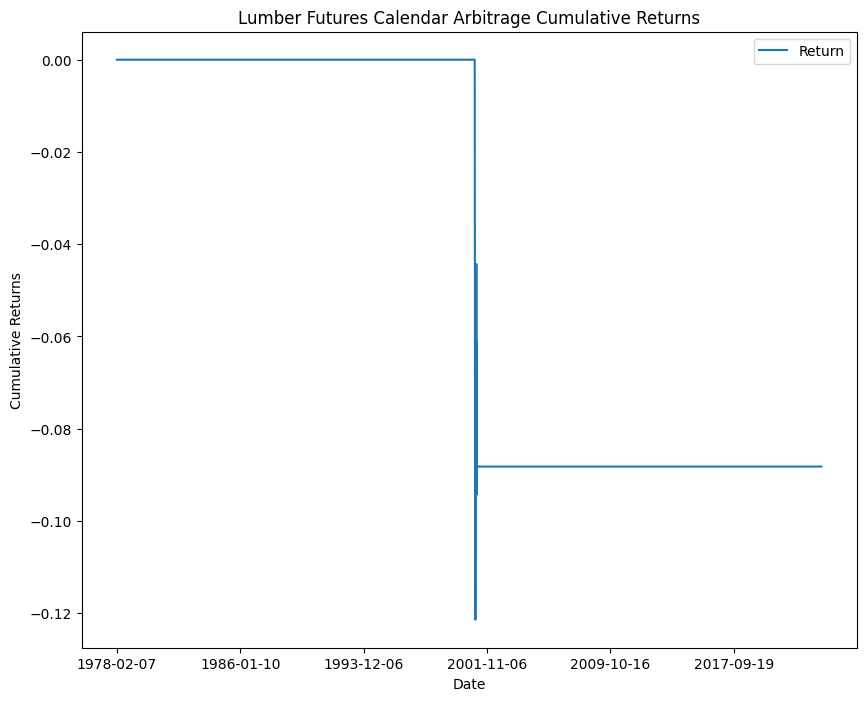

4 sets of triples used for calendar spread
annualized_sharpe_ratio: -0.1404872249005487
annualized_return: -0.003616952090551245
annualized_volatility: 0.025745772208908644
skewness: -6.682690295462166
kurtosis: 391.90026232929836
max_drawdown: -0.12139773660525288


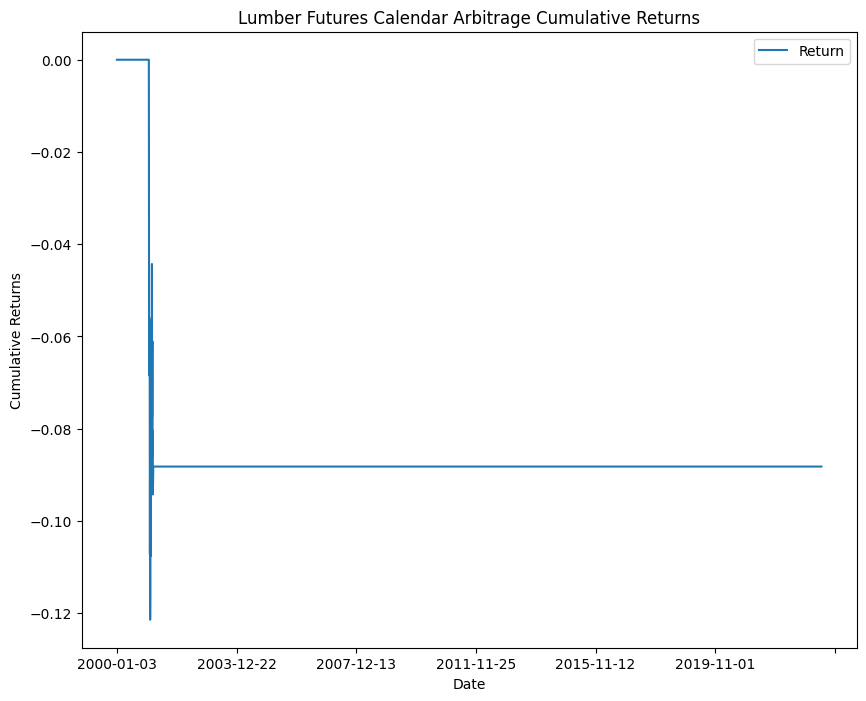

In [14]:
lumber = pd.read_csv('commodities/lumber.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(lumber, 'Lumber Futures Calendar Arbitrage Cumulative Returns')
plot_cumulative_returns(lumber, 'Lumber Futures Calendar Arbitrage Cumulative Returns', year='2000')

C:\Users\abhiv\AppData\Local\Temp\ipykernel_33460\2675232374.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  cotton = pd.read_csv('commodities/cotton2.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])


59 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.09967335054911151
annualized_return: 0.026867740590509854
annualized_volatility: 0.2695579153554335
skewness: -0.3679572693182601
kurtosis: 51.50733688651773
max_drawdown: -0.8592346616258635


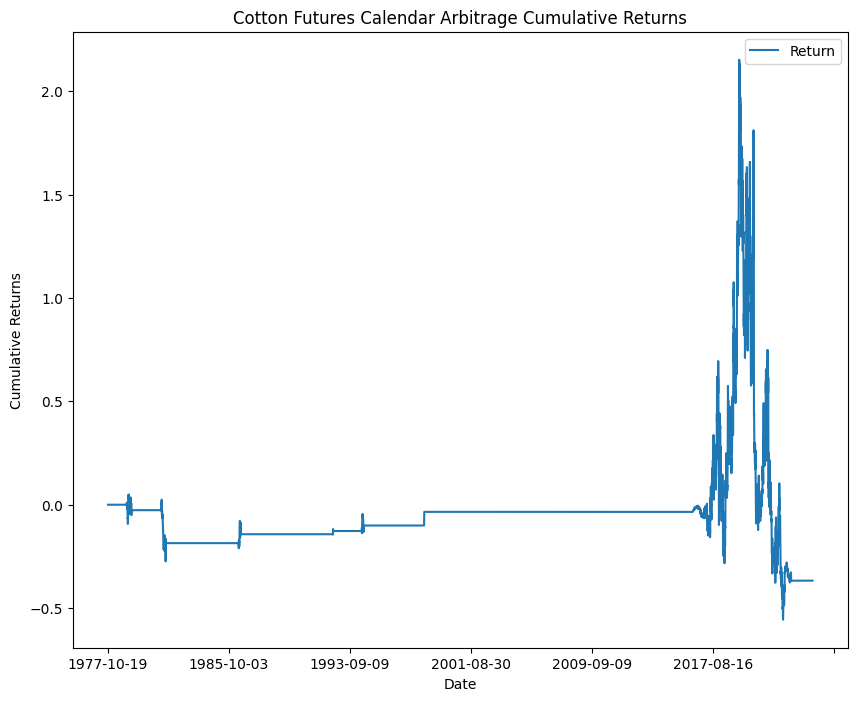

59 sets of triples used for calendar spread
annualized_sharpe_ratio: 0.2572578541573003
annualized_return: 0.1728494926176139
annualized_volatility: 0.6718919940610447
skewness: -0.1844259479798577
kurtosis: 6.033795006008875
max_drawdown: -0.8592346616258635


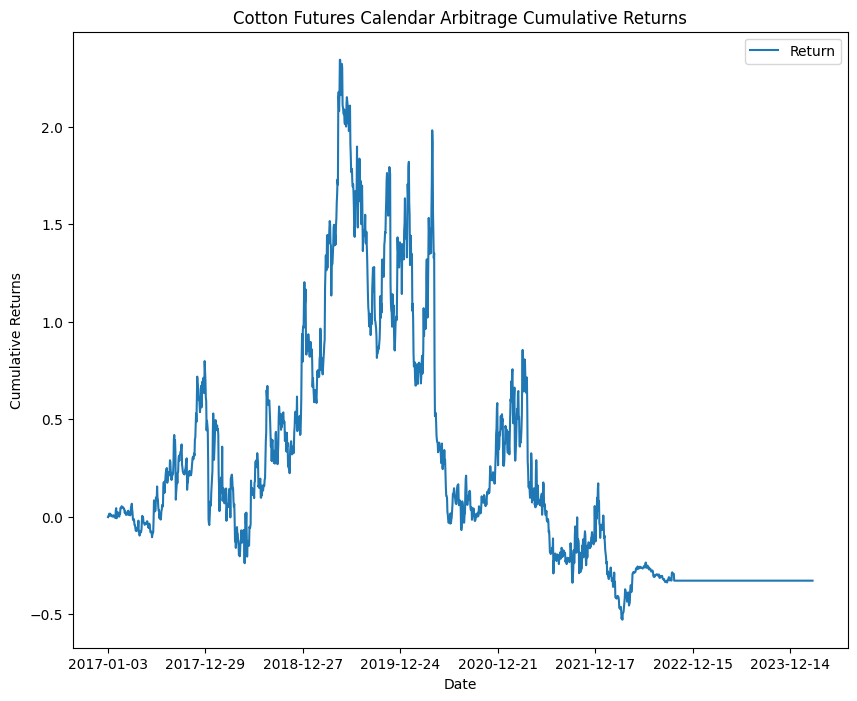

In [15]:
cotton = pd.read_csv('commodities/cotton2.csv').sort_values(by=['FutCode', 'Date_']).reset_index().drop(columns=['index'])
plot_cumulative_returns(cotton, 'Cotton Futures Calendar Arbitrage Cumulative Returns')
plot_cumulative_returns(cotton, 'Cotton Futures Calendar Arbitrage Cumulative Returns', '2017')